In [1]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse
import astropy.io.fits

In [4]:
f105 = fits.getdata('f105.fits')
f125 = fits.getdata('f125.fits')
f160 = fits.getdata('f160.fits')

In [6]:
median_f105 = np.nanmedian(f105[f105<1])
median_f125 = np.nanmedian(f125[f125<1])
median_f160 = np.nanmedian(f160[f160<1])

print(f'Median of F105 sky is {median_f105}')
print(f'Median of F125 sky is {median_f125}')
print(f'Median of F160 sky is {median_f160}')

Median of F105 sky is 0.0
Median of F125 sky is nan
Median of F160 sky is 0.0


/cm/shared/apps/python/3.10.12/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [9]:
f105 = f105.byteswap().newbyteorder()
f125 = f125.byteswap().newbyteorder()
f160 = f160.byteswap().newbyteorder()

bkg_f105 = sep.Background(f105)
bkg_f125 = sep.Background(f125)
bkg_f160 = sep.Background(f160)

f105 -= bkg_f105
f125 -= bkg_f125
f160 -= bkg_f160

In [10]:
median_f105 = np.nanmedian(f105[f105<1])
median_f125 = np.nanmedian(f125[f125<1])
median_f160 = np.nanmedian(f160[f160<1])

print(f'Median of F105 sky is {median_f105}')
print(f'Median of F125 sky is {median_f125}')
print(f'Median of F160 sky is {median_f160}')

Median of F105 sky is 1.293391096651404e-22
Median of F125 sky is -3736.33984375
Median of F160 sky is 2.268324725663603e-21


In [12]:
def rescale_data(data,dmin=0.01,dmax=10.0):

    datac = np.clip(data,dmin,dmax)
    return (np.log10(datac)-np.log10(dmin))/(np.log10(dmax)-np.log10(dmin))

In [13]:
p_f105 = rescale_data(f105)
p_f125 = rescale_data(f125)
p_f160 = rescale_data(f160)

In [15]:
rgb = np.stack([p_f160,0.7*p_f125,p_f105],axis=-1)
print(rgb.shape)

(3600, 3600, 3)


[W 2024-12-10 11:07:09,719.719 matplotlib.image] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


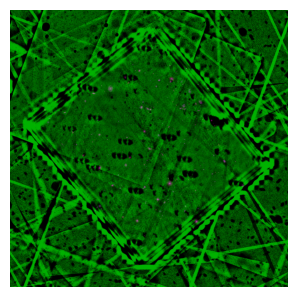

In [16]:
xsize = rgb.shape[1]
ysize = rgb.shape[0]

f,ax = plt.subplots(1,1,figsize=(xsize/1000.,ysize/1000.0))
ax.axis('off')
ax.imshow(rgb,origin='lower')